In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import train test split fromo sklearn
from sklearn.model_selection import train_test_split
import pycountry_convert
from pipeline_functions import *
import copy
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# dane = pd.read_excel('/Users/adammajczyk/Dokumenty-lokalne/DANE/online_retail_II.xlsx')
dane = pd.read_excel('online_retail_II.xlsx')

In [3]:
dane = initial_transform(dane)

In [4]:
dane = add_continent_and_eu_columns(dane)

In [14]:
dane

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Month,Year,Day,TotalPrice,YearMonth,Continent
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,12,2009,1,83.40,2009-12,EU_UK
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,2009,1,81.00,2009-12,EU_UK
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,12,2009,1,81.00,2009-12,EU_UK
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,12,2009,1,100.80,2009-12,EU_UK
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,12,2009,1,30.00,2009-12,EU_UK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,12,2010,9,5.90,2010-12,EU_UK
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,12,2010,9,3.75,2010-12,EU_UK
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,12,2010,9,3.75,2010-12,EU_UK
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,12,2010,9,7.50,2010-12,EU_UK


In [15]:
#split data in train test validation 0.8 0.1 0.1
train, test = train_test_split(dane, test_size=0.2)
train, val = train_test_split(train, test_size=0.125)


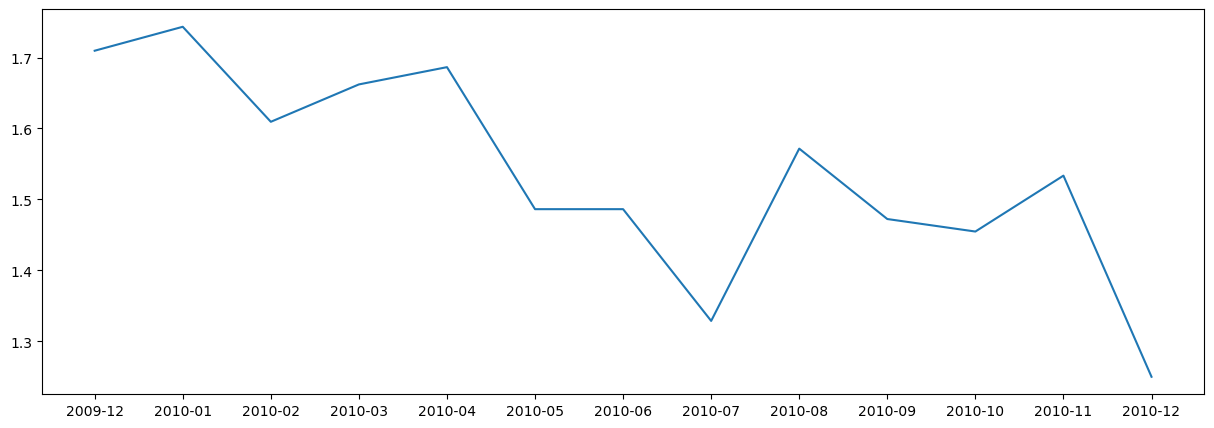

In [16]:
# plot price by date on x axis for stockcode 20979
plt.figure(figsize=(15,5))
plt.plot(train[train['StockCode'] == 20979].groupby('YearMonth')['Price'].mean())




<Figure size 1000x600 with 0 Axes>

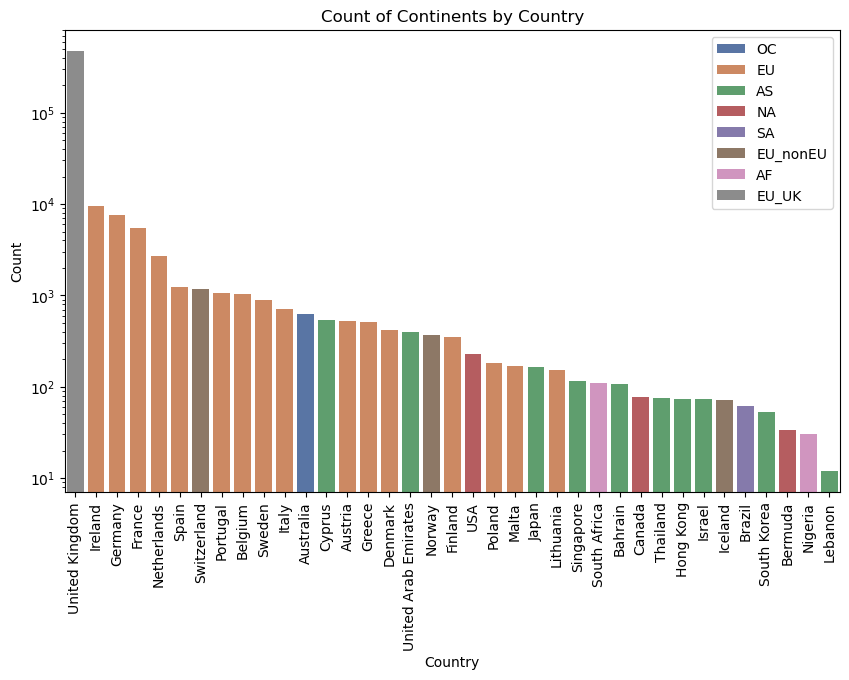

In [17]:
warnings.filterwarnings("ignore")
continent_counts = dane.groupby('Country')['Continent'].value_counts().reset_index(name='Count')
sorted_countries = continent_counts.groupby('Country').sum().sort_values(by='Count', ascending=False).index

plt.figure(figsize=(10, 6))

# Create a bar plot
plt.figure(figsize=(10, 6))

sns.barplot(x='Country', y='Count', hue='Continent', data=continent_counts,
            palette='deep', dodge=False, order=sorted_countries)

# Set labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Count of Continents by Country')
plt.yscale("log")
# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Add legend
plt.legend()

# Show the plot
plt.show()
warnings.filterwarnings("default")


In [13]:
items_group = {}
unique_products = dane["StockCode"].unique()
full_len = len(unique_products)
for i,product in enumerate(unique_products):
    df_ = dane[dane["StockCode"] == product] 
    df_ = df_.groupby(['Year', 'Month', 'StockCode']).agg({'Quantity': 'sum'}).reset_index()
    items_group[product] = df_
    print(f"{i}/{full_len}",end="\r")


KeyboardInterrupt: 

In [10]:
items_groupe = {}
for product in dane["StockCode"].unique():
    df_ = dane[dane["StockCode"] == product] 
    df_ = df_.groupby(['Year', 'Month', 'StockCode',"Continent"]).agg({'Quantity': 'sum'}).reset_index()
    continents_grouped[continent] = df_
    

KeyboardInterrupt: 

In [ ]:
list(continents_grouped.values())[0]

,Year,Month,StockCode,Continent,Quantity
0,2009,12,10002,EU_UK,108
1,2009,12,10080,EU_UK,4
2,2009,12,10109,EU_UK,4
3,2009,12,10120,EU_UK,115
4,2009,12,10125,EU_UK,128
...,...,...,...,...,...
35027,2010,12,BANK CHARGES,EU_UK,1
35028,2010,12,C2,EU_UK,2
35029,2010,12,DCGS0076,EU_UK,1
35030,2010,12,DOT,EU_UK,21


In [97]:
df = pd.concat( [df_ for key, df_ in continents_grouped.items()],axis=0)

In [ ]:
grouped_by_continent = df.groupby("Continent")
decomposition_dict = {}
for continent, continent_group in grouped_by_continent:
    grouped_by_item = continent_group.groupby('StockCode')
    for item, item_group in grouped_by_item:
        np.average(df.y - df.x, weights=df.index.asi8)
        result = seasonal_decompose(item_group['Quantity'], model='additive',two_sided=False)
        item_group['quantity_trend'] = result.trend
        item_group['quantity_seasonal'] = result.seasonal
        item_group['quantity_residual'] = result.resid

In [94]:
df

,Year,Month,StockCode,Continent,Quantity
0,2009,12,10002,EU_UK,108
1,2009,12,10080,EU_UK,4
2,2009,12,10109,EU_UK,4
3,2009,12,10120,EU_UK,115
4,2009,12,10125,EU_UK,128
...,...,...,...,...,...
56,2010,9,85023B,SA,2
57,2010,9,85024B,SA,2
58,2010,9,85123A,SA,3
59,2010,9,85124B,SA,2


In [39]:
def time_features(df):
    df['quantity_lag1'] = df['Quantity'].shift(1)
    df['quantity_lag2'] = df['Quantity'].shift(2)

    # Calculate rolling mean and standard deviation as features
    df['quantity_roll_mean'] = df['Quantity'].rolling(window=3).mean()
    df['quantity_roll_std'] = df['Quantity'].rolling(window=3).std()
    df.fillna(0,inplace=True)


In [40]:
for key,df_ in continents_grouped.items():
    time_features(df_)

In [88]:
# df['date'] = pd.to_datetime(df[['Year', 'Month']].assign(day=1))
# df.set_index('date', inplace=True)



In [89]:
df

,Year,Month,StockCode,Continent,Quantity
date,,,,,
2009-12-01,2009,12,10002,EU_UK,108
2009-12-01,2009,12,10080,EU_UK,4
2009-12-01,2009,12,10109,EU_UK,4
2009-12-01,2009,12,10120,EU_UK,115
2009-12-01,2009,12,10125,EU_UK,128
...,...,...,...,...,...
2010-09-01,2010,9,85023B,SA,2
2010-09-01,2010,9,85024B,SA,2
2010-09-01,2010,9,85123A,SA,3


In [92]:
grouped_by_continent = df.groupby("Continent")
decomposition_dict = {}
for continent, continent_group in grouped_by_continent:
    grouped_by_item = continent_group.groupby('StockCode')
    for item, item_group in grouped_by_item:
        np.average(df.y - df.x, weights=df.index.asi8)
        result = seasonal_decompose(item_group['Quantity'], model='additive',two_sided=False)
        item_group['quantity_trend'] = result.trend
        item_group['quantity_seasonal'] = result.seasonal
        item_group['quantity_residual'] = result.resid

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [ ]:
df_grouped['date'] = pd.to_datetime(df_grouped[['Year', 'Month']].assign(day=1))
df_grouped.set_index('date', inplace=True)

grouped_by_contiennt = df_grouped.grupby("Continent")

# Group by Item
grouped_by_item = df_grouped.groupby('StockCode')

# Perform seasonal decomposition for each item separately
decomposition_dict = {}
for item, group in grouped_by_item:
    result = seasonal_decompose(df_grouped['Quantity'], model='additive',two_sided=False)
    df_grouped['quantity_trend'] = result.trend
    df_grouped['quantity_seasonal'] = result.seasonal
    df_grouped['quantity_residual'] = result.resid

In [26]:

# Perform seasonal decomposition of time series
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_grouped['Quantity'], model='additive')
df_grouped['quantity_trend'] = result.trend
df_grouped['quantity_seasonal'] = result.seasonal
df_grouped['quantity_residual'] = result.resid

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [23]:
df_grouped.fillna(0)

,Year,Month,StockCode,Continent,Quantity,quantity_lag1,quantity_lag2,quantity_roll_mean,quantity_roll_std
0,2009,12,10002,EU,108,0.0,0.0,0.000000,0.000000
1,2009,12,10002,EU_UK,108,108.0,0.0,0.000000,0.000000
2,2009,12,10080,EU_UK,4,108.0,108.0,73.333333,60.044428
3,2009,12,10109,EU_UK,4,4.0,108.0,38.666667,60.044428
4,2009,12,10120,EU_UK,115,4.0,4.0,41.000000,64.085880
...,...,...,...,...,...,...,...,...,...
51517,2010,12,DCGS0076,EU_UK,1,2.0,3.0,2.000000,1.000000
51518,2010,12,DOT,EU_UK,21,1.0,2.0,8.000000,11.269428
51519,2010,12,M,EU_UK,119,21.0,1.0,47.000000,63.150614
51520,2010,12,POST,EU,96,119.0,21.0,78.666667,51.247764


In [ ]:
import dtale

dtale.show(dane)

c:\Users\artur\miniconda3\lib\site-packages\dtale\views.py:874: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

c:\Users\artur\miniconda3\lib\site-packages\dtale\views.py:756: FutureWarning:

['Invoice', 'StockCode', 'Description'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



In [ ]:
dtale.show(grouped_dane)

c:\Users\artur\miniconda3\lib\site-packages\dtale\views.py:756: FutureWarning:

['StockCode'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.

